In [1]:
import pandas as pd
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet
from tools.get_data.get_data_h5 import *
import os

* Alphalens需要我们准备两种数据：因子值，股票价格
* 因子数据要求用日期（level0）标的代码（level 1）多重索引（MultiIndex Series, DataFrame也可以）  
![示例图片](.//reference//alphalens1.jpg)
* 价格数据与因子数据的格式不同，索引是时间，每一列是每只股票对应的收盘价：  
![示例图片](.//reference//alphalens2.webp)

In [15]:
df = get_data("000001.XSHE", freq="daybar", type="equities")
df

symbol   datetime     high    close  total_turnover  \
12276550  000001.XSHE 2000-01-04   3.5942   3.5438    1.473254e+08   
12276551  000001.XSHE 2000-01-05   3.6523   3.4992    1.734752e+08   
12276552  000001.XSHE 2000-01-06   3.6910   3.6387    2.211925e+08   
12276553  000001.XSHE 2000-01-07   3.8305   3.7860    4.435924e+08   
12276554  000001.XSHE 2000-01-10   3.9681   3.9022    3.722945e+08   
...               ...        ...      ...      ...             ...   
12282008  000001.XSHE 2022-07-14  13.7100  13.3700    3.534579e+09   
12282009  000001.XSHE 2022-07-15  13.5600  13.2400    2.139915e+09   
12282010  000001.XSHE 2022-07-18  13.4400  13.3900    1.536341e+09   
12282011  000001.XSHE 2022-07-19  13.4300  13.4200    1.008562e+09   
12282012  000001.XSHE 2022-07-20  13.4700  13.3900    1.073936e+09   

          limit_down  limit_up  num_trades        volume      low     open  
12276550      3.0439    3.7201     11288.0  3.248330e+07   3.3326   3.3907  
12276551      3.1892    3.8984     14591.0  3.716167e+07   3.4876   3.5554  
12276552      3.1485    3.8499     15029.0  4.753174e+07   3.4392   3.4915  
12276553      3.2745    4.0030     29217.0  9.067570e+07   3.6620   3.6814  
12276554      3.4082    4.1638     26004.0  7.322581e+07   3.8305   3.8344  
...              ...       ...         ...           ...      ...      ...  
12282008     12.5700   15.3700    182328.0  2.632121e+08  13.2900  13.7000  
12282009     12.0300   14.7100    118034.0  1.598637e+08  13.2200  13.4800  
12282010     11.9200   14.5600     87770.0  1.153506e+08  13.2100  13.2500  
12282011     12.0500   14.7300     50955.0  7.555971e+07  13.2800  13.3400  
12282012     12.0800   14.7600     51617.0  8.014587e+07  13.3500  13.4300  

[5463 rows x 11 columns]

In [17]:
df[-10000:]

symbol   datetime     high    close  total_turnover  \
12276550  000001.XSHE 2000-01-04   3.5942   3.5438    1.473254e+08   
12276551  000001.XSHE 2000-01-05   3.6523   3.4992    1.734752e+08   
12276552  000001.XSHE 2000-01-06   3.6910   3.6387    2.211925e+08   
12276553  000001.XSHE 2000-01-07   3.8305   3.7860    4.435924e+08   
12276554  000001.XSHE 2000-01-10   3.9681   3.9022    3.722945e+08   
...               ...        ...      ...      ...             ...   
12282008  000001.XSHE 2022-07-14  13.7100  13.3700    3.534579e+09   
12282009  000001.XSHE 2022-07-15  13.5600  13.2400    2.139915e+09   
12282010  000001.XSHE 2022-07-18  13.4400  13.3900    1.536341e+09   
12282011  000001.XSHE 2022-07-19  13.4300  13.4200    1.008562e+09   
12282012  000001.XSHE 2022-07-20  13.4700  13.3900    1.073936e+09   

          limit_down  limit_up  num_trades        volume      low     open  
12276550      3.0439    3.7201     11288.0  3.248330e+07   3.3326   3.3907  
12276551      3.1892    3.8984     14591.0  3.716167e+07   3.4876   3.5554  
12276552      3.1485    3.8499     15029.0  4.753174e+07   3.4392   3.4915  
12276553      3.2745    4.0030     29217.0  9.067570e+07   3.6620   3.6814  
12276554      3.4082    4.1638     26004.0  7.322581e+07   3.8305   3.8344  
...              ...       ...         ...           ...      ...      ...  
12282008     12.5700   15.3700    182328.0  2.632121e+08  13.2900  13.7000  
12282009     12.0300   14.7100    118034.0  1.598637e+08  13.2200  13.4800  
12282010     11.9200   14.5600     87770.0  1.153506e+08  13.2100  13.2500  
12282011     12.0500   14.7300     50955.0  7.555971e+07  13.2800  13.3400  
12282012     12.0800   14.7600     51617.0  8.014587e+07  13.3500  13.4300  

[5463 rows x 11 columns]

In [18]:
listdir = os.listdir('Y:/DataBase_RQ_files/minbar/equities')
stocks_list = [eqt[:-3] for eqt in listdir if eqt.endswith('.h5')][:3]
factors = pd.DataFrame()
for std in stocks_list:
    df_min = get_data(symbol=std, freq="daybar", type="equities")[[
        "datetime", "volume", "close", "symbol"
    ]][-2000:]
    df_min.set_index(["datetime", "symbol"], inplace=True, drop=True)
    factors = pd.concat([factors, df_min], axis=0)
rtn = factors.pivot_table(index='datetime', columns='symbol', values='close')

print(factors.head(),rtn.head())

                              volume   close
datetime   symbol                           
2014-05-07 000001.XSHE  4.180210e+07  5.6645
2014-05-08 000001.XSHE  6.559849e+07  5.7063
2014-05-09 000001.XSHE  5.562689e+07  5.7689
2014-05-12 000001.XSHE  1.040242e+08  5.9203
2014-05-13 000001.XSHE  5.284799e+07  5.8629 symbol      000001.XSHE  000002.XSHE
datetime                            
2014-05-07       5.6645       5.6537
2014-05-08       5.7063       5.5704
2014-05-09       5.7689       5.5022
2014-05-12       5.9203       5.5476
2014-05-13       5.8629       5.7068


In [12]:
factors.index.get_level_values('datetime')

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18',
               '2022-07-19', '2022-07-20'],
              dtype='datetime64[ns]', name='datetime', length=10926, freq=None)

In [13]:
merged_data = get_clean_factor_and_forward_returns(factor=factors["volume"],
                                                   prices=rtn,
                                                   # quantiles=5,
                                                   bins=10,
                                                   quantiles=None,
                                                   periods=(1,3,5, 10,20,30,40),
                                                   )


c:\veighna_studio\lib\site-packages\alphalens\utils.py:319: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_days = period_len.components.days - mode(days_diffs).mode[0]


Dropped 0.7% entries from factor data: 0.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


min           max          mean           std  count  \
factor_quantile                                                               
1                      0.0  5.996036e+08  5.931432e+07  5.671153e+07   5412   
5                      0.0  0.000000e+00  0.000000e+00  0.000000e+00     22   
10               3752784.0  1.028373e+09  1.115562e+08  9.175573e+07   5412   

                  count %  
factor_quantile            
1                49.89858  
5                 0.20284  
10               49.89858

Returns Analysis


c:\veighna_studio\lib\site-packages\alphalens\plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


1D     3D     5D    10D  \
Ann. alpha                                    -0.004  0.058  0.060  0.059   
beta                                           0.040  0.029  0.020  0.044   
Mean Period Wise Return Top Quantile (bps)     0.128  2.456  2.485  2.592   
Mean Period Wise Return Bottom Quantile (bps) -0.128 -2.457 -2.488 -2.598   
Mean Period Wise Spread (bps)                  0.256  4.912  4.973  5.204   

                                                 20D    30D    40D  
Ann. alpha                                     0.048  0.046  0.041  
beta                                           0.050  0.018  0.004  
Mean Period Wise Return Top Quantile (bps)     2.226  1.933  1.616  
Mean Period Wise Return Bottom Quantile (bps) -2.235 -1.944 -1.627  
Mean Period Wise Spread (bps)                  4.480  3.878  3.231

<Figure size 640x480 with 0 Axes>

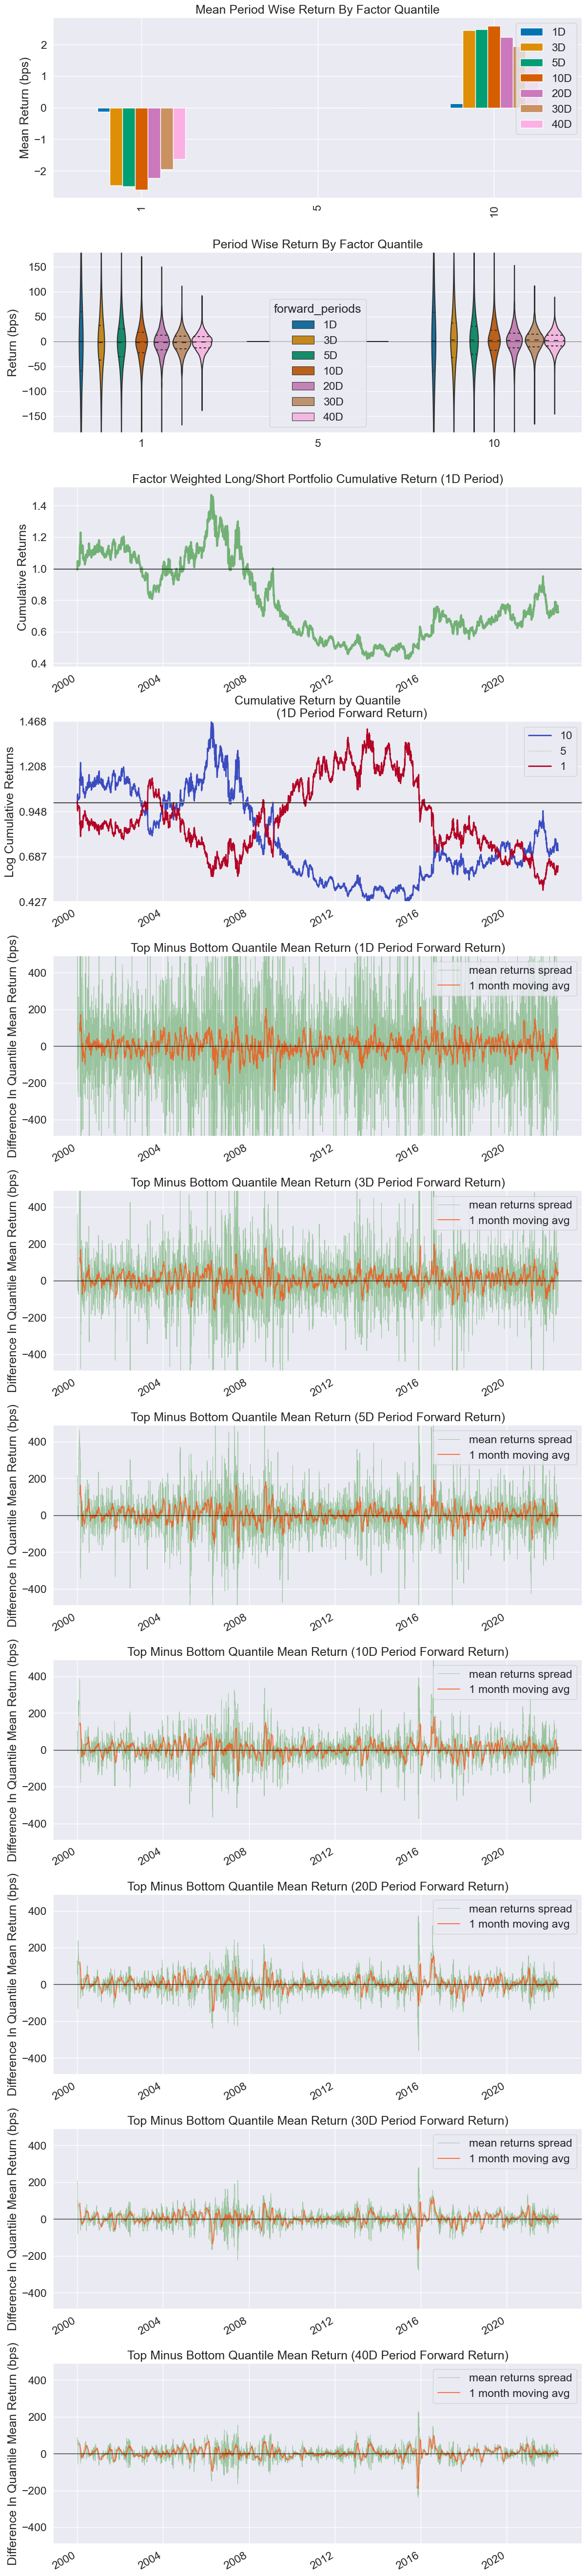

c:\veighna_studio\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\veighna_studio\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\veighna_studio\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\veighna_studio\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\veighna_studio\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coeffic

Information Analysis


1D     3D     5D    10D    20D    30D    40D
IC Mean           0.007  0.047  0.043  0.052  0.069  0.091  0.065
IC Std.           1.000  0.999  0.999  0.999  0.998  0.996  0.998
Risk-Adjusted IC  0.007  0.047  0.043  0.052  0.069  0.091  0.065
t-stat(IC)          NaN    NaN    NaN    NaN    NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN    NaN    NaN    NaN    NaN
IC Skew             NaN    NaN    NaN    NaN    NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN    NaN    NaN    NaN    NaN

c:\veighna_studio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\veighna_studio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\veighna_studio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

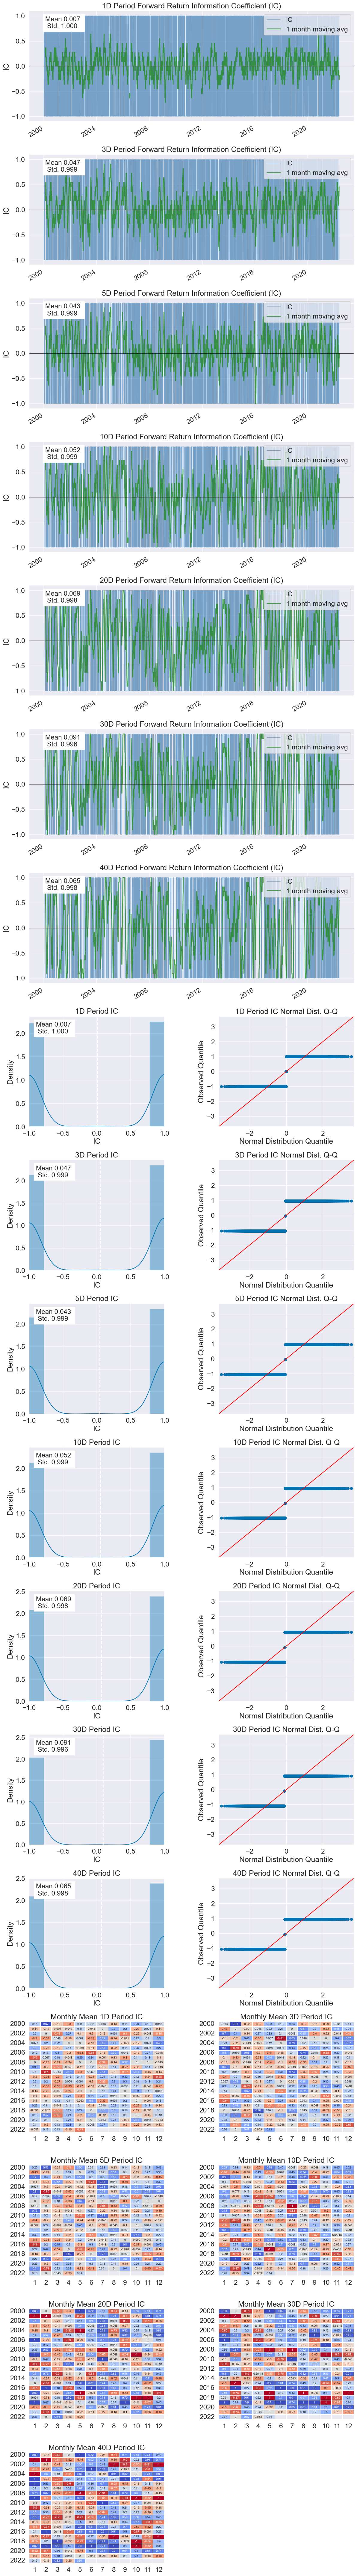

c:\veighna_studio\lib\site-packages\alphalens\utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     3D     5D    10D    20D   30D    40D
Quantile 1 Mean Turnover    0.208  0.245  0.256  0.281  0.307  0.32  0.332
Quantile 5 Mean Turnover    0.000  0.000  0.000  0.000    NaN   NaN    NaN
Quantile 10 Mean Turnover   0.208  0.245  0.256  0.281  0.307  0.32  0.332

1D     3D     5D    10D    20D    30D  \
Mean Factor Rank Autocorrelation  0.583  0.509  0.488  0.437  0.389  0.361   

                                    40D  
Mean Factor Rank Autocorrelation  0.336

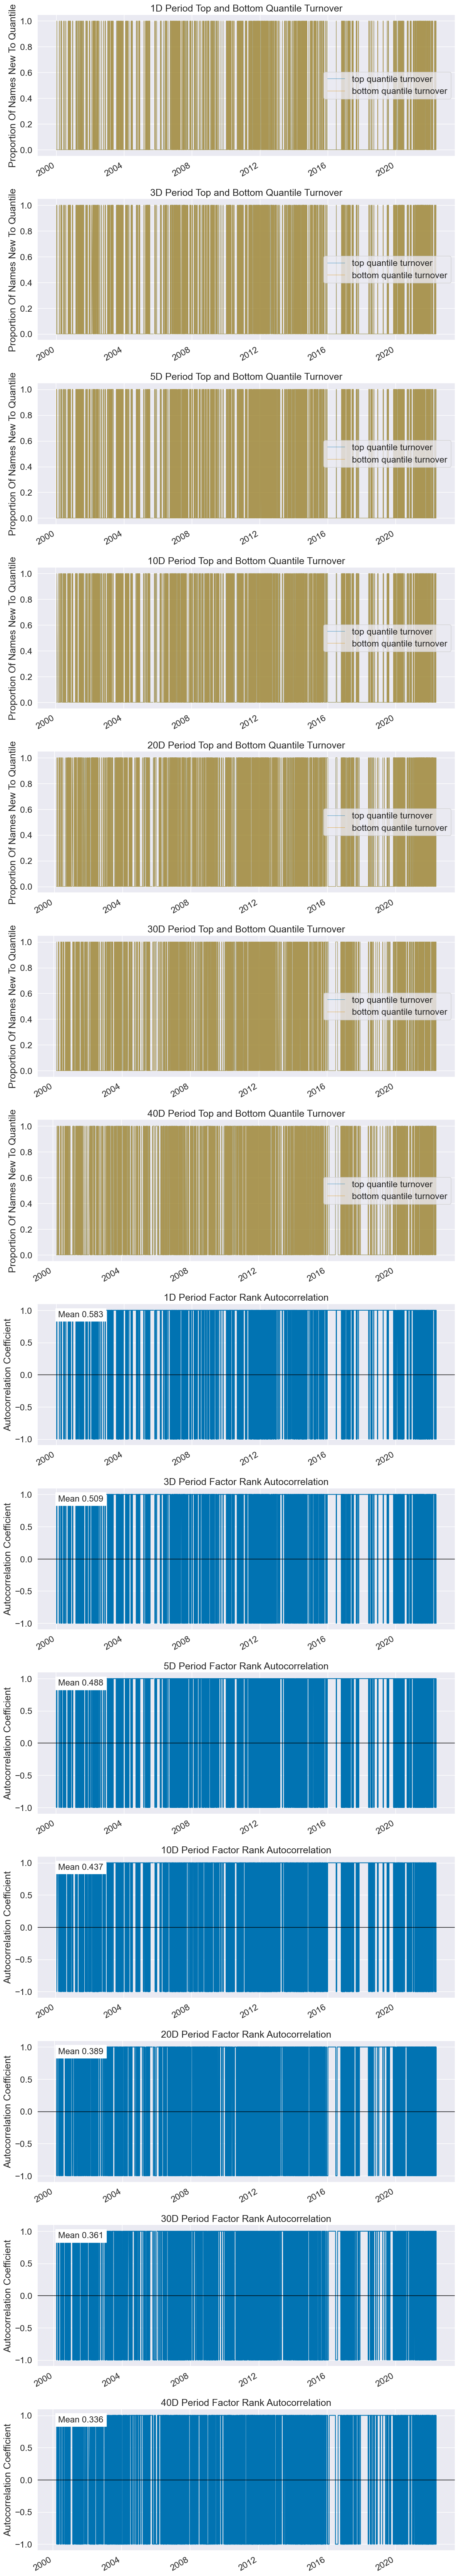

In [14]:
create_full_tear_sheet(merged_data, long_short=True, group_neutral=False, by_group=False)

In [ ]:
returns = rtn
out = np.empty_like(rtn)
out


In [ ]:
help(create_full_tear_sheet)
help(get_clean_factor_and_forward_returns)

In [ ]:
equities1 = get_data(symbol="000638.XSHE", freq="minbar", type="equities")
# rb99.to_feather('rb99.feather')
equities1.to_feather('equities1.feather')


In [ ]:
pd.read_feather("E:\\Work\\5 Research\\factor_analysis\\equities1.feather")

In [ ]:
rtn["000001.XSHE"].pct_change().cumsum().plot()

In [ ]:
(rtn["000001.XSHE"].pct_change()+1).cumprod().plot()

In [ ]:
rtn["000001.XSHE"]